# Convexity of the XOR Problem

## Contents
[XOR Distribution](#XOR-Distribution)<br>
[Building MLP](#Building-MLP)<br>

## Things to do:
- Think about how to plot out the cost function
- Change the initializer to random
- Animate the live graph


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

%config InLineBackend.figure_format = 'svg' #magic code that gets svg rendered graphics. makes the plot nicer

## XOR Distribution 
[Back to Contents](#Contents)

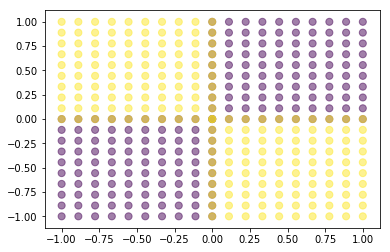

In [3]:
from data_utils import generate_XOR_distribution
Input,Output = generate_XOR_distribution(1)
plt.scatter(Input[:,0],Input[:,1], s = 50, c = Output, alpha= 0.5)
plt.show()

In [4]:
def sig(z):
    return 1/(1+np.exp(-z))

In [5]:
# Onehot encoding output
Output = keras.utils.to_categorical(Output,num_classes=2)

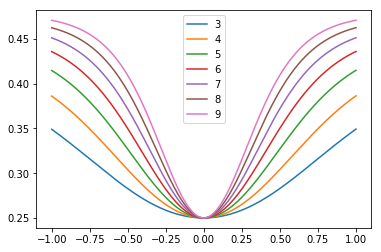

In [6]:
min_weights = -1
max_weights = 1
num_of_points = 1000

for j in range(3,10):
    hidden_nodes = j
    W1_test = np.zeros([2,hidden_nodes]) + min_weights 
    W2_test = np.zeros([hidden_nodes,2]) + min_weights

    # print("h1: ",h1)
    # print("h2: ",h2)
    all_costs = []
    # cost = ((Output - h2)**2).mean()
    # print(cost)

    for i in np.linspace(min_weights,max_weights,num_of_points):
    #     print(i)
        W1_test += abs(max_weights - min_weights)/num_of_points
        W2_test += abs(max_weights - min_weights)/num_of_points

    #     print("==================================")
    #     print(W1_test)
    #     print("==================================")
        h1 = sig(np.dot(Input,W1_test))
        h2 = sig(np.dot(h1,W2_test))
        cost = ((Output - h2)**2).mean()

        all_costs.append(cost)
    # print(all_costs)

    plt.plot(np.linspace(min_weights,max_weights,num_of_points), all_costs, label = repr(j))
plt.legend()
plt.show()

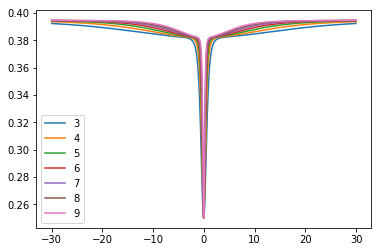

In [7]:
min_weights = -30
max_weights = 30
num_of_points = 1000

for j in range(3,10):
    hidden_nodes = j
    W1_test = np.zeros([2,hidden_nodes]) + min_weights 
    W2_test = np.zeros([hidden_nodes,2]) + min_weights

    # print("h1: ",h1)
    # print("h2: ",h2)
    all_costs = []
    # cost = ((Output - h2)**2).mean()
    # print(cost)

    for i in np.linspace(min_weights,max_weights,num_of_points):
    #     print(i)
#         W1_test += abs(max_weights - min_weights)/num_of_points
        W2_test += abs(max_weights - min_weights)/num_of_points

    #     print("==================================")
    #     print(W1_test)
    #     print("==================================")
        h1 = sig(np.dot(Input,W1_test))
        h2 = sig(np.dot(h1,W2_test))
        cost = ((Output - h2)**2).mean()

        all_costs.append(cost)
    # print(all_costs)

    plt.plot(np.linspace(min_weights,max_weights,num_of_points), all_costs, label = repr(j))
plt.legend()
plt.show()

## Building MLP
[Back to Contents](#Contents)

In [8]:
# Building mlp
n_input = 2
n_hidden = 2
n_output = 2

X = tf.placeholder(tf.float32, shape = [None,n_input], name = "Input")
W1 = tf.get_variable(name = 'W1', shape=[n_input,n_hidden], 
                     dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
W2 = tf.get_variable(name = 'W2', shape=[n_hidden,n_output], 
                     dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())

In [4]:
# Onehot encoding output
Output = keras.utils.to_categorical(Output,num_classes=2)

In [9]:
# Operations
h1 = tf.nn.sigmoid(tf.matmul(X,W1), name = 'h1') 
Y_hat = tf.nn.sigmoid(tf.matmul(h1,W2), name = 'Y_hat')

# Training
cost = tf.reduce_mean(tf.squared_difference(Y_hat,Output), name = 'cost')
train = tf.train.AdamOptimizer(learning_rate = 10e-3).minimize(cost)
initOP = tf.global_variables_initializer()

In [10]:
import time
# Session
with tf.Session() as sess:
    tic = time.time()
    sess.run(initOP)
    epoch = 10000
    for i in range(epoch):
        sess.run(train,feed_dict={X:Input})
        if i%100 == 0:
            error = cost.eval(feed_dict={X:Input})
            toc = time.time()
            print("Epoch: {}, Error: {}, Time Taken: {}".format(i, error, toc-tic))
    
    print(sess.run(W1))
    print(sess.run(W2))


Epoch: 0, Error: 0.2621264159679413, Time Taken: 0.052034854888916016
Epoch: 100, Error: 0.2500004470348358, Time Taken: 0.07406878471374512
Epoch: 200, Error: 0.24999995529651642, Time Taken: 0.08969449996948242
Epoch: 300, Error: 0.25, Time Taken: 0.10532045364379883
Epoch: 400, Error: 0.25, Time Taken: 0.13657045364379883
Epoch: 500, Error: 0.25, Time Taken: 0.15219616889953613
Epoch: 600, Error: 0.25, Time Taken: 0.18344497680664062
Epoch: 700, Error: 0.25, Time Taken: 0.19907188415527344
Epoch: 800, Error: 0.25, Time Taken: 0.21469688415527344
Epoch: 900, Error: 0.25, Time Taken: 0.24898815155029297
Epoch: 1000, Error: 0.25, Time Taken: 0.2571284770965576
Epoch: 1100, Error: 0.25, Time Taken: 0.2929244041442871
Epoch: 1200, Error: 0.25, Time Taken: 0.3149397373199463
Epoch: 1300, Error: 0.25, Time Taken: 0.32396411895751953
Epoch: 1400, Error: 0.25, Time Taken: 0.35521578788757324
Epoch: 1500, Error: 0.25, Time Taken: 0.37084054946899414
Epoch: 1600, Error: 0.25, Time Taken: 0.386